In [ ]:
# This one uses the real data

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
np.set_printoptions(precision=3)

%matplotlib inline
plt.style.use('ggplot')

In [7]:
# Import actual data
raw = np.genfromtxt('site_data_raw.csv', delimiter = ',')
site_list = ['Saginaw Malleable','Pontiac North Industrial','Linden Road','Bay City Powertrain','Coldwater Road','Davison Road','Greenpoint','Hemphill','Saginaw Malleable Peninsula','Van Buren','Buick City','Flint West (Kettering)','Danville','Allison Gas Turbine','Framingham','Massena','Salina', 'Tonawanda','Elyria','Toledo']

# Import weights, use as np.dot(A,wgts)
eyes = eye((11)).A
arr = np.array([20., 16., 15., 15., 8., 5., 5., 5., 4., 4., 3.])/100
wgts = eyes*arr

N=100 # number of simulations is N-1, referred to as N

In [19]:
# SETUP

results = np.copy(raw)

# N-1 randomizations of raw, create 20x11xN matrix
# results of kth simulation with results[:,:,k-1]
# Random Normal Permuation with mu=x, sigma=1
for i in range(0,N):
    cpy = np.copy(raw)
    # If < 0 set to 0, ,if > 10 set to 10
    for x in np.nditer(cpy, op_flags=['readwrite']):
        # random permutation = mu + sigma * randn
        x[...] = x + M.randn(1,1)*1
        if x>10: x[...] = 10
        if x<0: x[...] = 0
    results = np.dstack((results,cpy))
    

In [3]:
# Check shape and save 
results.shape
np.save('results',results)

NameError: name 'results' is not defined

#### Import Results (Start Here) 

In [4]:
results = np.load('results.npy')

### Analysis

In [8]:
score_list = []
for i in range(0,N):
    score_list.append(pd.Series(data=np.sum(np.dot(results[:,:,i], wgts), axis=1), index = [k for k in site_list]))
scores = pd.DataFrame(score_list)

rank_list = []
for i in range(0,N):
    rank_list.append(pd.Series(data=np.sum(np.dot(results[:,:,i], wgts), axis=1), index = [k for k in site_list]).rank(ascending = False))
ranks = pd.DataFrame(rank_list)

In [37]:
ranks

,Saginaw Malleable,Pontiac North Industrial,Linden Road,Bay City Powertrain,Coldwater Road,Davison Road,Greenpoint,Hemphill,Saginaw Malleable Peninsula,Van Buren,Buick City,Flint West (Kettering),Danville,Allison Gas Turbine,Framingham,Massena,Salina,Tonawanda,Elyria,Toledo
0,5.0,3.0,13.0,12.0,14.0,10.0,7.0,15.0,17.0,18.0,9.0,11.0,6.0,16.0,8.0,1.0,2.0,4.0,19.5,19.5
1,8.0,3.0,18.0,7.0,13.0,10.0,11.0,12.0,20.0,17.0,9.0,14.0,4.0,15.0,6.0,2.0,1.0,5.0,16.0,19.0
2,9.0,4.0,11.0,14.0,13.0,6.0,10.0,16.0,15.0,18.0,7.0,12.0,5.0,17.0,8.0,1.0,2.0,3.0,19.0,20.0
3,5.0,4.0,9.0,12.0,15.0,10.0,8.0,14.0,17.0,16.0,13.0,7.0,6.0,18.0,11.0,2.0,1.0,3.0,20.0,19.0
4,7.0,2.0,16.0,12.0,14.0,8.0,11.0,10.0,17.0,18.0,6.0,9.0,5.0,15.0,13.0,1.0,4.0,3.0,19.0,20.0
5,6.0,4.0,14.0,11.0,13.0,10.0,8.0,18.0,17.0,15.0,9.0,12.0,5.0,16.0,7.0,1.0,2.0,3.0,20.0,19.0
6,6.0,2.0,12.0,18.0,11.0,13.0,8.0,14.0,17.0,20.0,9.0,10.0,5.0,15.0,7.0,1.0,3.0,4.0,19.0,16.0
7,3.0,1.0,13.0,10.0,14.0,16.0,11.0,15.0,17.0,19.0,6.0,7.0,9.0,12.0,8.0,2.0,4.0,5.0,18.0,20.0
8,6.0,3.0,16.0,13.0,11.0,14.0,15.0,8.0,18.0,17.0,9.0,10.0,4.0,12.0,7.0,1.0,2.0,5.0,19.0,20.0
9,8.0,2.0,16.0,14.0,12.0,10.0,6.0,13.0,17.0,19.0,11.0,7.0,4.0,15.0,9.0,1.0,3.0,5.0,18.0,20.0


/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


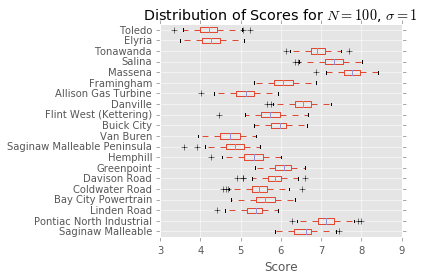

In [10]:
# Plot as 10 historgrams of distribution of SCORES 
scores.boxplot(vert=0)
plt.tight_layout()
plt.xlabel('Score')
plt.title('Distribution of Scores for $N=100$, $\sigma = 1$')
plt.savefig('score_boxplot.pdf')
plt.show()


/home/spencer/Apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


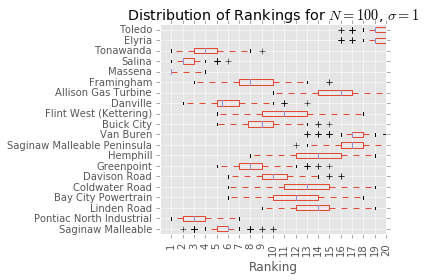

In [11]:
# Plot as 11 histograms of distribution of RANKINGS
ranks.boxplot(vert=0)
plt.title('Distribution of Rankings for $N=100$, $\sigma = 1$')
plt.xlabel('Ranking')
plt.xticks([i for i in range(1,21)], rotation = 'vertical')
plt.tight_layout()
plt.savefig('rank_boxplot.pdf')
plt.show()